In [1]:
#notebook for snotel site analysis

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint
# Import API key
from api_keys import g_key

In [3]:
#Prepare intro images and analysis
#google map showing location, name and elevation of each snotel site
snotel = "resources/Snotel_Sites.csv"
snotel_df = pd.read_csv(snotel)
snotel_df.head()

,site_name,start,lat,lon,elev,Avg_SWE,county
0,Bear Lake (322),1979-October,40.31,-105.64,9500,20.82,Larimer
1,Berthoud Summit (335),1963-September,39.80,-105.78,11300,22.88,Grand
2,Brumley (369),1979-October,39.09,-106.54,10600,12.22,Lake
3,Butte (380),1979-October,38.89,-106.95,10160,15.80,Gunnison
4,Columbine (408),1978-October,40.39,-106.60,9160,25.85,Jackson


In [4]:
snotel_df.describe()

,lat,lon,elev,Avg_SWE
count,31.000000,31.000000,31.000000,31.000000
mean,39.889355,-106.205484,9997.741935,19.056774
std,0.653325,0.481649,828.833355,7.772441
min,38.490000,-107.290000,8400.000000,5.860000
25%,39.370000,-106.605000,9500.000000,14.040000
50%,40.030000,-106.160000,10120.000000,18.540000
75%,40.405000,-105.800000,10600.000000,21.520000
max,40.880000,-105.540000,11400.000000,50.780000


In [5]:
gmaps.configure(api_key=g_key)
sites=snotel_df[["lat","lon"]]
elevation=snotel_df["elev"]
name=snotel_df["site_name"]

fig=gmaps.figure()

sitename=snotel_df["site_name"].tolist()
markers=gmaps.marker_layer(sites,info_box_content=[f"{x}" for x in sitename])

fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

In [6]:
locations=snotel_df[["lat","lon"]]
elevation=snotel_df["elev"]
figure_layout = {
    'width': '50%',
    'height': '420px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig2 = gmaps.figure(layout=figure_layout)
heat_layer=gmaps.heatmap_layer(locations,dissipating=True,point_radius=12)
fig2.add_layer(heat_layer)
fig2

Figure(layout=FigureLayout(border='1px solid black', height='420px', margin='0 auto 0 auto', padding='1px', wi…

In [9]:
# examine elevation vs. average SWE
snotel_df.head()
snotel_present=snotel_df[["site_name","elev","Avg_SWE","county"]]
snotel_present.head()

,site_name,elev,Avg_SWE,county
0,Bear Lake (322),9500,20.82,Larimer
1,Berthoud Summit (335),11300,22.88,Grand
2,Brumley (369),10600,12.22,Lake
3,Butte (380),10160,15.80,Gunnison
4,Columbine (408),9160,25.85,Jackson


The Correlation between Elev. and SWE is 0.3


<function matplotlib.pyplot.show(close=None, block=None)>

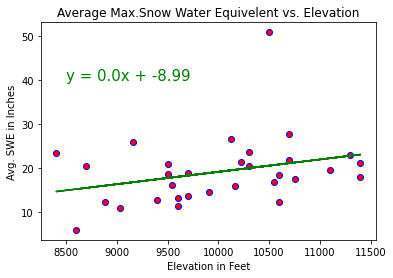

In [8]:
import scipy.stats as st

x_axis=snotel_present['elev']
y_axis=snotel_present['Avg_SWE']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,facecolor='r',edgecolor='b')
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(8500,40),fontsize=15,color="green")
plt.title('Average Max.Snow Water Equivelent vs. Elevation')
plt.xlabel('Elevation in Feet')
plt.ylabel('Avg. SWE in Inches')
correlation = st.pearsonr(x_axis,y_axis)
print(f"The Correlation between Elev. and SWE is {round(correlation[0],2)}")
plt.savefig("../images/elev_vs_swe.png")
plt.show